In [ ]:

!pip install -U -q PyDrive
!pip install -U -q wordcloud
!pip install -U -q bokeh
!pip install textblob
!pip install sklearn

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from scipy.stats import hmean
from scipy.stats import norm
from pylab import *
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from time import time

  

     |████████████████████████████████| 366 kB 5.2 MB/s 
     |████████████████████████████████| 18.5 MB 495 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
import json
with open('cnn_news.json', 'r') as datafile:
  data = json.load(datafile)
news_df = pd.DataFrame(data)


In [ ]:
news_df.head(10)

,title,url,published_at,last_modified_at,author,short_description,header_image,raw_content,content,crawled_at,_id,source
0,Fleetwood and Hoey lead big names in Dunhill L...,https://edition.cnn.com/2011/09/30/sport/golf/...,2011-09-30T19:30:12Z,2011-09-30T20:19:30Z,By,Unheralded pair Tommy Fleetwood of England and...,https://cdn.cnn.com/cnnnext/dam/assets/1109300...,"<div class=""l-container""><div class=""el__leafm...",Fleetwood and Hoey lead big names in Dunhill L...,"07/23/2021, 00:15:23",0d641f2c-1b43-5651-adb5-18ccea4df489,edition.cnn.com
1,Senna to replace Heidfeld in Belgium,https://edition.cnn.com/2011/08/24/sport/motor...,2011-08-24T17:54:07Z,2011-08-26T16:49:15Z,By,Brazilian driver Bruno Senna will replace Nick...,https://cdn.cnn.com/cnnnext/dam/assets/1108240...,"<div class=""l-container""><div class=""el__leafm...",Senna to replace Heidfeld in BelgiumBy Updated...,"07/23/2021, 00:15:23",2419cdcf-50a7-5b04-a9fc-fd7813731fe9,edition.cnn.com
2,Zvonareva beats Kvitova to reach Tokyo final,https://edition.cnn.com/2011/09/30/sport/tenni...,2011-09-30T14:59:26Z,2011-09-30T20:22:34Z,By,Russian Vera Zvonareva came from 5-1 down in t...,https://cdn.cnn.com/cnnnext/dam/assets/1109300...,"<div class=""l-container""><div class=""el__leafm...",Zvonareva beats Kvitova to reach Tokyo finalBy...,"07/23/2021, 00:15:23",fc9c8863-007f-540f-9f6f-4981f2ae6cb6,edition.cnn.com
3,Country profile: Macedonia,https://edition.cnn.com/2011/09/30/world/europ...,2011-09-30T04:34:03Z,2011-09-30T04:34:03Z,By Catriona Davies and Eoghan Macguire for CNN,Macedonia is a small landlocked country border...,https://cdn.cnn.com/cnnnext/dam/assets/1109291...,"<div class=""l-container""><div class=""el__leafm...",Country profile: MacedoniaBy Catriona Davies a...,"07/23/2021, 00:15:23",f7625158-e643-5859-819c-6736f7e40d31,edition.cnn.com
4,Manchester City ban talk of Tevez,https://edition.cnn.com/2011/09/30/sport/footb...,2011-09-30T16:54:25Z,2011-09-30T16:55:10Z,By,Manchester City banned journalists from asking...,https://cdn.cnn.com/cnnnext/dam/assets/1109300...,"<div class=""l-container""><div class=""el__leafm...",Manchester City ban talk of TevezBy Updated 16...,"07/23/2021, 00:15:24",91e56668-cad7-5654-ad7f-770c92ac443e,edition.cnn.com
5,Medvedev said he cedes presidency bid to Putin...,https://edition.cnn.com/2011/09/30/world/europ...,2011-09-30T12:41:09Z,2011-09-30T17:25:34Z,"By Maxim Tkachenko, CNN",President Dmitry Medvedev said Friday he had c...,https://cdn.cnn.com/cnnnext/dam/assets/1109301...,"<div class=""l-container""><div class=""el__leafm...",Medvedev said he cedes presidency bid to Putin...,"07/23/2021, 00:15:24",17ca13e8-13b1-5fe0-8722-4bb5f0396020,edition.cnn.com
6,Cave art the work of prehistoric pre-schoolers,https://edition.cnn.com/2011/09/30/world/europ...,2011-09-30T15:03:28Z,2011-09-30T15:19:58Z,"By Nick Thompson, CNN",Prehistoric children as young as three were en...,https://cdn.cnn.com/cnnnext/dam/assets/1109300...,"<div class=""l-container""><div class=""el__leafm...",Cave art the work of prehistoric pre-schoolers...,"07/23/2021, 00:15:24",227908ea-355e-502f-adf2-6776c8e75a23,edition.cnn.com
7,Lawyers argue evidence in Knox murder trial,https://edition.cnn.com/2011/09/30/world/europ...,2011-09-30T05:30:40Z,2011-10-02T11:29:16Z,By the CNN Wire Staff,"Prosecutors say Amanda Knox is guilty ""regardl...",https://cdn.cnn.com/cnnnext/dam/assets/1109261...,"<div class=""l-container""><div class=""el__leafm...",Lawyers argue evidence in Knox murder trialBy ...,"07/23/2021, 00:15:24",0e0b209c-cd2f-546a-b490-e1e6888ac3fb,edition.cnn.com
8,France to open North Korea office,https://edition.cnn.com/2011/09/29/world/europ...,2011-09-29T13:19:19Z,2011-09-29T14:31:30Z,By the CNN Wire Staff,France is to open an office in North Korea in ...,https://cdn.cnn.com/cnnnext/dam/assets/1109290...,"<div class=""l-container""><div class=""el__leafm...",France to open North Korea officeBy the CNN Wi...,"07/23/2021, 00:15:24",e9e7dd13-21d3-5705-9a67-3386b2f07

In [ ]:
news_df.to_csv('Dataset_For_Project/cnn_news.csv', encoding='utf-8')

In [ ]:
news_df.tail(10)

,title,url,published_at,last_modified_at,author,short_description,header_image,raw_content,content,crawled_at,_id,source
3490,Olazabal steps down as Europe's Ryder Cup captain,https://edition.cnn.com/2012/10/02/sport/golf/...,2012-10-02T15:48:20Z,2012-10-02T15:48:20Z,By,Jose Maria Olazabal has confirmed he will not ...,https://cdn.cnn.com/cnnnext/dam/assets/1210020...,"<div class=""l-container""><div class=""el__leafm...",Olazabal steps down as Europe's Ryder Cup capt...,"07/23/2021, 00:23:03",2e487cb0-f213-584e-a4ae-54db2ad4d328,edition.cnn.com
3491,Court: Pussy Riot appeal hearing to continue ...,https://edition.cnn.com/2012/10/01/world/europ...,2012-10-01T04:13:43Z,2012-10-01T14:04:21Z,By the CNN Wire Staff,The appeal hearing for three members of the pu...,https://cdn.cnn.com/cnnnext/dam/assets/1208170...,"<div class=""l-container""><div class=""el__leafm...",Court: Pussy Riot appeal hearing to continue ...,"07/23/2021, 00:23:04",1c16b971-1fdc-5466-b237-fedc7f4f4863,edition.cnn.com
3492,Miracle of Medinah: How Seve's spirit inspired...,https://edition.cnn.com/2012/10/01/sport/golf/...,2012-10-01T18:59:44Z,2012-10-02T11:14:51Z,"By Piers Edwards, CNN",Even though the Ryder Cup prize ceremony took ...,https://cdn.cnn.com/cnn/.e/img/4.0/logos/cnn_l...,"<div class=""l-container""><div class=""el__leafm...",Miracle of Medinah: How Seve's spirit inspired...,"07/23/2021, 00:23:04",cb5635e3-e63a-5f5f-b6be-8f0db3d99b72,edition.cnn.com
3493,Europe drinks in Ryder Cup success as U.S. scr...,https://edition.cnn.com/2012/10/01/sport/golf/...,2012-10-01T21:02:31Z,2012-10-01T22:03:33Z,"By Chris Murphy, CNN",It is the day after the tumultuous one before.,https://cdn.cnn.com/cnnnext/dam/assets/1210010...,"<div class=""l-container""><div class=""el__leafm...",Europe drinks in Ryder Cup success as U.S. scr...,"07/23/2021, 00:23:04",b55228ca-4db7-598b-aaa4-4ad5590a667d,edition.cnn.com
3494,Vaz Te winner lifts West Ham as QPR are left r...,https://edition.cnn.com/2012/10/01/sport/footb...,2012-10-01T21:45:58Z,2012-10-01T21:45:58Z,By,West Ham United striker Ricardo Vaz Te heaped ...,https://cdn.cnn.com/cnnnext/dam/assets/1210010...,"<div class=""l-container""><div class=""el__leafm...",Vaz Te winner lifts West Ham as QPR are left r...,"07/23/2021, 00:23:04",2d492994-5e0a-5a7e-a3eb-562f88d768d4,edition.cnn.com
3495,Kremlin critic Lebedev: Why I lashed out on TV...,https://edition.cnn.com/2012/10/01/world/europ...,2012-10-01T11:47:24Z,2012-10-01T12:38:45Z,"By Phil Black and Peter Wilkinson, CNN",Russian billionaire businessman and outspoken ...,https://cdn.cnn.com/cnnnext/dam/assets/1209300...,"<div class=""l-container""><div class=""el__leafm...",Kremlin critic Lebedev: Why I lashed out on TV...,"07/23/2021, 00:23:05",946e3153-3697-558d-80e7-1c0587174d88,edition.cnn.com
3496,Never forget: Football remembers,https://edition.cnn.com/2012/11/30/sport/footb...,2012-11-30T20:55:24Z,2012-12-01T18:46:18Z,"By James Masters, CNN",The Premier League's 'Christmas Truce' tournam...,https://cdn.cnn.com/cnnnext/dam/assets/1211300...,"<div class=""l-container""><div class=""el__leafm...",Never forget: Football remembersBy James Maste...,"07/23/2021, 00:23:05",855f08d9-9872-51aa-b93b-a576b2d4b46b,edition.cnn.com
3497,Schumacher coy over Sauber switch,https://edition.cnn.com/2012/10/01/sport/motor...,2012-10-01T15:51:41Z,2012-10-01T16:02:52Z,By,Michael Schumacher is keeping all his options ...,https://cdn.cnn.com/cnnnext/dam/assets/1210010...,"<div class=""l-container""><div class=""el__leafm...",Schumacher coy over Sauber switchBy Updated 16...,"07/23/2021, 00:23:05",437298b0-aa5d-57a9-9898-49cac6a7ba70,edition.cnn.com
3498,It's official: Vettel is three-time champion a...,https://edition.cnn.com/2012/11/30/sport/motor...,2012-11-30T12:21:35Z,2012-11-30T12:21:35Z,By,It's official: Sebastian Vettel is a three-tim...,https://cdn.cnn.com/cnnnext/dam/assets/1211281...,"<div class=""l-container""><div class=""el__leafm...",It's official: Vettel is three-time champion 

In [ ]:
news_df.shape

(3500, 12)

In [ ]:
df_tweets=pd.read_csv('SC_Project/trump_entire_tweet_clean.csv', usecols=[0,1], encoding='utf-8')
df_tweets

In [ ]:
df_tweets=pd.read_csv('Dataset_For_Project/cnn_news.csv', usecols=[1], encoding='utf-8')
df_tweets.head()

,title
0,Fleetwood and Hoey lead big names in Dunhill L...
1,Senna to replace Heidfeld in Belgium
2,Zvonareva beats Kvitova to reach Tokyo final
3,Country profile: Macedonia
4,Manchester City ban talk of Tevez


In [ ]:
df_tweets.to_csv('Dataset_For_Project/cnn_news_headline.csv', encoding='utf-8')

In [ ]:
#Method to add a character at the end of each line in a json file

"""
with open('Dataset_For_Project/huffpost.json', 'r') as istr:
    with open('Dataset_For_Project/outputhuff.json', 'w') as ostr:
        for line in istr:
            line = line.rstrip('\n') + ','
            print(line, file=ostr)

"""
   

In [ ]:
import pandas as pd

In [ ]:
import json
with open('Dataset_For_Project/huffpost.json', 'r') as datafile:
  data = json.load(datafile)
news_df = pd.DataFrame(data)

In [ ]:
news_df.head(5)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
news_df.loc[news_df['category'] == "POLITICS"]

,category,headline,authors,link,short_description,date
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,2018-05-26
...,...,...,...,...,...,...
124970,POLITICS,Why Chris Christie Should NOT Be President,"Al Eisele, ContributorEditor-at-Large, The Hill",https://www.huffingtonpost.com/entry/why-chris...,Apparently that's just the way they play polit...,2014-04-18
124978,POLITICS,GOP's Old Ploy: Tag President Obama as the Rac...,"Earl Ofari Hutchinson, ContributorAuthor and p...",https://www.huffingtonpost.com/entry/gops-old-...,The baiting and the assault on Obama will get ...,2014-04-18
124979,POLITICS,Lawmakers Introduce Bill To Tackle Misleadingl...,Shadee Ashtari,https://www.huffingtonpost.com/entry/photoshop...,,2014-04-18
124980,POLITICS,Dear President Obama,"Robin Amos Kahn, ContributorWriter, Speaker, L...",https://www.huffingtonpost.com/entry/dear-pres...,"I'm assuming you are aware of this issue, Pres...",2014-04-18


# **Times of India dataset**

In [ ]:
df_times=pd.read_csv('Dataset_For_Project/times_of_india.csv', encoding='utf-8')
df_times

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
df_times.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [ ]:
df_times['new_date'] = pd.to_datetime(df_times['publish_date'].astype(str), format='%Y%m%d')


In [ ]:
df_times

,publish_date,headline_category,headline_text,new_date
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,20010102,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,20010102,unknown,America's unwanted heading for India?,2001-01-02
3,20010102,unknown,For bigwigs; it is destination Goa,2001-01-02
4,20010102,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...,2022-03-31
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31


In [ ]:
df_times.dtypes

publish_date                  int64
headline_category            object
headline_text                object
new_date             datetime64[ns]
dtype: object

In [ ]:
start_date = '2019-06-01'
end_date= '2020-01-01'


In [ ]:
mask = (df_times['new_date'] > start_date) & (df_times['new_date']< end_date)


In [ ]:
df_new = df_times.loc[mask]
df_new

,publish_date,headline_category,headline_text,new_date
3135216,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02
3135217,20190602,city.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02
3135218,20190602,life-style.relationships.love-sex,Natasha is my rock; the stabilising factor in ...,2019-06-02
3135219,20190602,life-style.beauty,Get some scents,2019-06-02
3135220,20190602,life-style.fashion.celeb-style,Good sunglasses are a must-have,2019-06-02
...,...,...,...,...
3241453,20191231,city.amritsar,No relief from cold; two killed in road accide...,2019-12-31
3241454,20191231,city.hyderabad,Hyderabad man dies at EDM fest; third death in...,2019-12-31
3241455,20191231,city.nagpur,A trip to a tribal village with super cop Vija...,2019-12-31
3241456,20191231,city.nagpur,Wi-Fi at over 5;500 railway stations; thanks t...,2019-12-31


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 596 kB 57.6 MB/s 
     |████████████████████████████████| 6.6 MB 15.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
result = sentiment_classifier(df_new['headline_text'].tolist())


In [ ]:
for res in result:
    print(f"label: {res['label']}, with score: {round(res['score'], 4)}")

Streaming output truncated to the last 5000 lines.
label: NEGATIVE, with score: 0.9878
label: POSITIVE, with score: 0.6742
label: NEGATIVE, with score: 0.9824
label: POSITIVE, with score: 0.9918
label: NEGATIVE, with score: 0.9542
label: NEGATIVE, with score: 0.9012
label: NEGATIVE, with score: 0.9012
label: POSITIVE, with score: 0.9884
label: POSITIVE, with score: 0.9883
label: NEGATIVE, with score: 0.9934
label: POSITIVE, with score: 0.9997
label: POSITIVE, with score: 0.9988
label: POSITIVE, with score: 0.9994
label: POSITIVE, with score: 0.9992
label: NEGATIVE, with score: 0.9959
label: NEGATIVE, with score: 0.9923
label: POSITIVE, with score: 0.9884
label: NEGATIVE, with score: 0.9993
label: NEGATIVE, with score: 0.5409
label: POSITIVE, with score: 0.9995
label: NEGATIVE, with score: 0.9921
label: NEGATIVE, with score: 0.9992
label: POSITIVE, with score: 0.9978
label: NEGATIVE, with score: 0.9973
label: POSITIVE, with score: 0.9904
label: POSITIVE, with score: 0.9978
label: POSITI

In [ ]:
df_sent=pd.DataFrame(result)
df_sent.head(10)

,label,score
0,NEGATIVE,0.984324
1,NEGATIVE,0.984324
2,POSITIVE,0.999551
3,POSITIVE,0.992363
4,POSITIVE,0.999199
5,POSITIVE,0.999123
6,NEGATIVE,0.995472
7,NEGATIVE,0.997695
8,NEGATIVE,0.988956
9,POSITIVE,0.727431


In [ ]:
df_sent.shape

(106242, 2)

In [ ]:
df_new.shape

(106242, 4)

In [ ]:
df_combined = pd.concat([df_new, df_sent], axis=1, join='inner')
df_combined.head()

,publish_date,headline_category,headline_text,new_date,label,score


In [ ]:
df_combined.shape

(0, 6)

In [ ]:
df_sent.to_csv("Dataset_For_Project/news_sent.csv", index = False, encoding='utf-8')


In [ ]:
df_new.to_csv("Dataset_For_Project/news_reduced.csv", index = False, encoding='utf-8')


In [ ]:
df1 = pd.read_csv("Dataset_For_Project/news_sent.csv")
df2 = pd.read_csv("Dataset_For_Project/news_reduced.csv")


In [ ]:
df2.shape

(106242, 4)

In [ ]:
df_comb = pd.concat([df2, df1], axis=1, join='inner')
df_comb.head()

,publish_date,headline_category,headline_text,new_date,label,score
0,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,NEGATIVE,0.984324
1,20190602,city.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,NEGATIVE,0.984324
2,20190602,life-style.relationships.love-sex,Natasha is my rock; the stabilising factor in ...,2019-06-02,POSITIVE,0.999551
3,20190602,life-style.beauty,Get some scents,2019-06-02,POSITIVE,0.992363
4,20190602,life-style.fashion.celeb-style,Good sunglasses are a must-have,2019-06-02,POSITIVE,0.999199


In [ ]:
df_comb.shape

(106242, 6)

In [ ]:
df_comb.rename(columns={'label':'sentiment', 'headline_text': 'text', 'new_date': 'published_date'}, inplace=True)
df_comb.head()

,publish_date,headline_category,text,published_date,Sentiment,score
0,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,NEGATIVE,0.984324
1,20190602,city.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,NEGATIVE,0.984324
2,20190602,life-style.relationships.love-sex,Natasha is my rock; the stabilising factor in ...,2019-06-02,POSITIVE,0.999551
3,20190602,life-style.beauty,Get some scents,2019-06-02,POSITIVE,0.992363
4,20190602,life-style.fashion.celeb-style,Good sunglasses are a must-have,2019-06-02,POSITIVE,0.999199


In [ ]:
df_comb['Sentiment'].value_counts()

NEGATIVE    71370
POSITIVE    34872
Name: Sentiment, dtype: int64

In [ ]:
df_comb['Sentiment'] = df_comb['Sentiment'].replace(['NEGATIVE'],'Negative')
df_comb['Sentiment'] = df_comb['Sentiment'].replace(['POSITIVE'],'Positive')


In [ ]:
df_comb.head()

,publish_date,headline_category,text,published_date,Sentiment,score
0,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,Negative,0.984324
1,20190602,city.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,Negative,0.984324
2,20190602,life-style.relationships.love-sex,Natasha is my rock; the stabilising factor in ...,2019-06-02,Positive,0.999551
3,20190602,life-style.beauty,Get some scents,2019-06-02,Positive,0.992363
4,20190602,life-style.fashion.celeb-style,Good sunglasses are a must-have,2019-06-02,Positive,0.999199


In [ ]:
#find duplicate values in a 'Tweets' Column
df_duplicate=df_comb[df_comb.duplicated(['text'], keep=False)]
df_duplicate

,publish_date,headline_category,text,published_date,Sentiment,score
0,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,Negative,0.984324
1,20190602,city.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,Negative,0.984324
12,20190602,life-style.health-fitness.de-stress,How I Start My Day,2019-06-02,Positive,0.993496
16,20190602,entertainment.events.varanasi,Some soulful music for Banarasis,2019-06-02,Positive,0.999605
17,20190602,city.varanasi,Some soulful music for Banarasis,2019-06-02,Positive,0.999605
...,...,...,...,...,...,...
106234,20191231,politics.politics-specials,Maharashtra deputy CM post for Ajit proves Paw...,2019-12-31,Positive,0.966669
106235,20191231,politics.news,Shiv Sena's alliance driver Sanjay Raut doesn'...,2019-12-31,Negative,0.972571
106236,20191231,city.ludhiana,No relief from cold; two killed in road accide...,2019-12-31,Negative,0.999104
106237,20191231,city.amritsar,No relief from cold; two killed in road accide...,2019-12-31,Negative,0.999104


In [ ]:
df_comb=df_comb.drop_duplicates( "text" , keep='first')

In [ ]:
df_comb.shape

(99125, 6)

In [ ]:
df_comb['Sentiment'].value_counts()

Negative    67585
Positive    31540
Name: Sentiment, dtype: int64

In [ ]:
df_comb.to_csv("Dataset_For_Project/news_with_sent.csv", index = False, encoding='utf-8')


## **Re-sampling/ Under sampling of Negative tweets to match the count of positive tweets**

In [ ]:
# class count
class_count_neg, class_count_pos = df_comb['Sentiment'].value_counts()

In [ ]:
# divie class
class_neg = df_comb[df_comb['Sentiment'] == 'Negative']
class_pos = df_comb[df_comb['Sentiment'] == 'Positive']

In [ ]:
# print the shape of the class
print('class neg:', class_neg.shape)
print('\nclass pos:', class_pos.shape)

class neg: (67585, 6)

class pos: (31540, 6)


total class of neg and pos:
 Negative    31540
Positive    31540
Name: Sentiment, dtype: int64


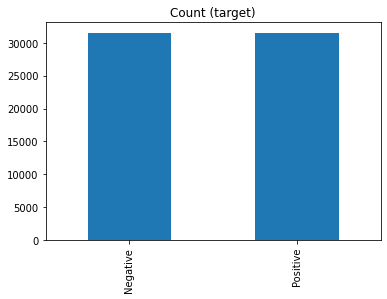

In [ ]:
class_neg_under = class_neg.sample(class_count_pos)

test_under = pd.concat([class_neg_under, class_pos], axis=0)

print("total class of neg and pos:\n",test_under['Sentiment'].value_counts())

test_under['Sentiment'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [ ]:
test_under.shape

(63080, 6)

In [ ]:
test_under.head()

,publish_date,headline_category,text,published_date,Sentiment,score
46454,20190903,city.bhopal,MP to study new Motor Act before implementing ...,2019-09-03,Negative,0.943231
95481,20191210,city.nashik,Bhujbal says higher power rate driving industr...,2019-12-10,Negative,0.994664
96626,20191212,entertainment.hindi.bollywood,Mandira Bedi shares a monochrome picture in a ...,2019-12-12,Negative,0.884372
84514,20191118,city.noida,Harassment in office: DM seeks action-taken re...,2019-11-18,Negative,0.998100
3923,20190609,city.mumbai,Two students end their lives,2019-06-09,Negative,0.959635


In [ ]:
test_under['Sentiment'].value_counts()

Negative    31540
Positive    31540
Name: Sentiment, dtype: int64

In [ ]:
test_under.to_csv("Dataset_For_Project/timesofindia_final.csv", index = False, encoding='utf-8')


# **Resampling using imblearn library**

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import library
import imblearn
from collections import Counter


In [ ]:
x = df_comb.iloc[:]
y = df_comb.iloc[:, -2]


In [ ]:
x

,publish_date,headline_category,text,published_date,Sentiment,score
0,20190602,entertainment.events.kolhapur,Siddharth Jadhav; Iravati Harshe amongst those...,2019-06-02,Negative,0.984324
2,20190602,life-style.relationships.love-sex,Natasha is my rock; the stabilising factor in ...,2019-06-02,Positive,0.999551
3,20190602,life-style.beauty,Get some scents,2019-06-02,Positive,0.992363
4,20190602,life-style.fashion.celeb-style,Good sunglasses are a must-have,2019-06-02,Positive,0.999199
5,20190602,life-style.relationships.pets,Mineral magic and its effect on coat condition,2019-06-02,Positive,0.999123
...,...,...,...,...,...,...
106225,20191231,city.lucknow,Why is crime against women rising? Lucknow Uni...,2019-12-31,Negative,0.943795
106226,20191231,world.middle-east,Cyprus court finds British teenager guilty of ...,2019-12-31,Negative,0.930118
106239,20191231,city.nagpur,A trip to a tribal village with super cop Vija...,2019-12-31,Positive,0.999557
106240,20191231,city.nagpur,Wi-Fi at over 5;500 railway stations; thanks t...,2019-12-31,Positive,0.850718


In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({'Negative': 67585, 'Positive': 31540})
Resample dataset shape Counter({'Negative': 31540, 'Positive': 31540})


In [ ]:
x_rus

,publish_date,headline_category,text,published_date,Sentiment,score
0,20190720,entertainment.events.bhopal,I had carried grain sacks of 50 kgs on my shou...,2019-07-20,Negative,0.989181
1,20190604,city.surat,Delayed rains raise worry of worsening water c...,2019-06-04,Negative,0.967016
2,20191123,india,Pegasus attacked 121 in India; breached 20: Wh...,2019-11-23,Negative,0.989658
3,20190621,city.chandigarh,Haryana: Vehicles painted fluorescent to preve...,2019-06-21,Negative,0.937335
4,20190927,city.bhubaneswar,Odisha: Commissioner joins STF in grilling dru...,2019-09-27,Negative,0.800170
...,...,...,...,...,...,...
63075,20191231,city.delhi,Going to India Gate tonight? You could be in f...,2019-12-31,Positive,0.959035
63076,20191231,city.mumbai,40;000 cops to ensure safe New Year celebratio...,2019-12-31,Positive,0.991466
63077,20191231,city.mumbai,Ten more private trains from Mumbai on cards,2019-12-31,Positive,0.823456
63078,20191231,city.nagpur,A trip to a tribal village with super cop Vija...,2019-12-31,Positive,0.999557


In [ ]:
x_rus.to_csv("Dataset_For_Project/timesofindia_final1.csv", index = False, encoding='utf-8')
